In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test=pd.read_csv(r"C:\Users\bisha\Downloads\Titanic dataset\test.csv")
df_train=pd.read_csv(r"C:\Users\bisha\Downloads\Titanic dataset\train.csv")

In [3]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
dataset=pd.concat([df_train,df_test],ignore_index=True)

In [5]:
df=dataset.copy()

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df['Age'].isnull().sum()

263

In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [12]:
#filled the age with mean value
df['Age']=df['Age'].fillna(df['Age'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [14]:
df.dropna(subset=['Fare','Embarked'],axis=0,inplace=True)

In [15]:
df['Embarked'].value_counts()

Embarked
S    913
C    270
Q    123
Name: count, dtype: int64

In [16]:
df['Family']=df['SibSp']+df['Parch']+1

In [17]:
df['Pclass'].value_counts()

Pclass
3    708
1    321
2    277
Name: count, dtype: int64

In [18]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

## Basic Eda Process

In [19]:
import seaborn as sns

In [20]:
#For Univariate numerical Data
def makehisto(data,df):
    fig,ax=plt.subplots(2,1,figsize=(10,8))
    sns.histplot(data=data,kde=True,ax=ax[0])
    sns.boxplot(x=data,ax=ax[1])
    plt.tight_layout()
    plt.show()

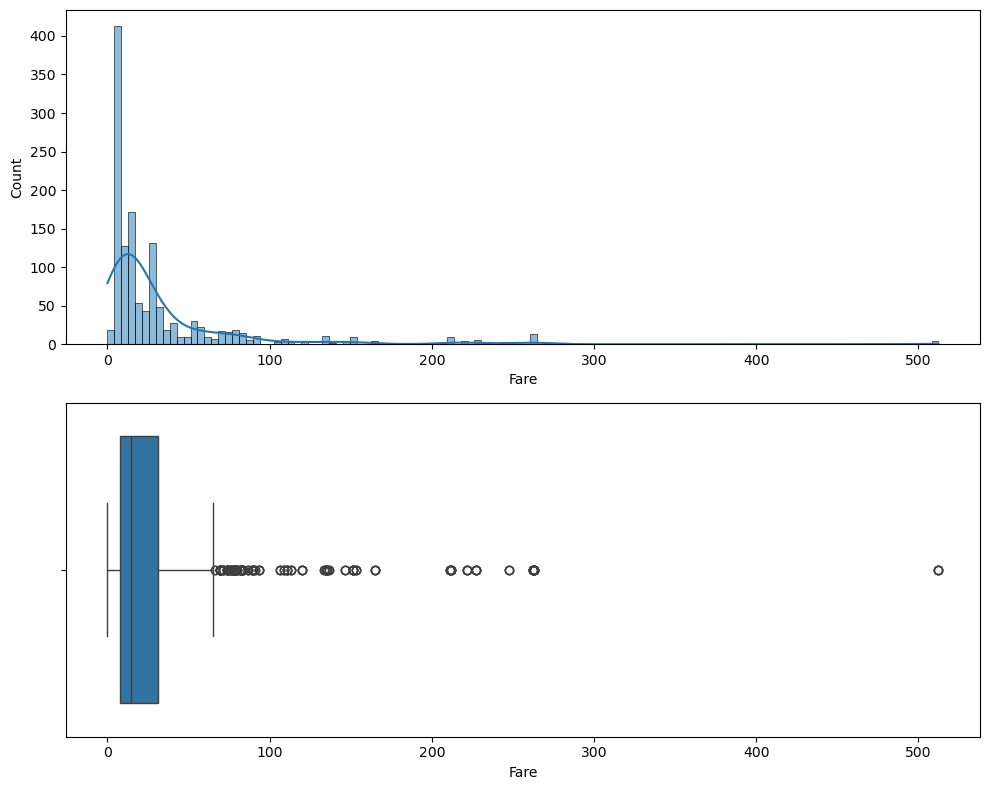

In [21]:
makehisto(df['Fare'],df)

<Axes: xlabel='Age', ylabel='Count'>

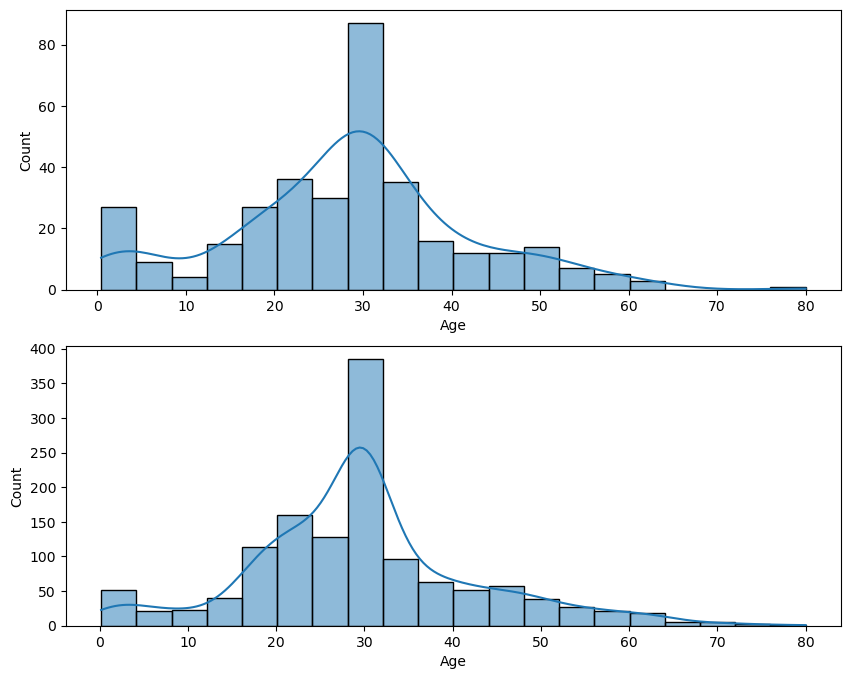

In [22]:
fig,ax=plt.subplots(2,1,figsize=(10,8))
sns.histplot(df[df['Survived']==1]['Age'], kde=True, bins=20,ax=ax[0])
sns.histplot(df['Age'], kde=True, bins=20,ax=ax[1])

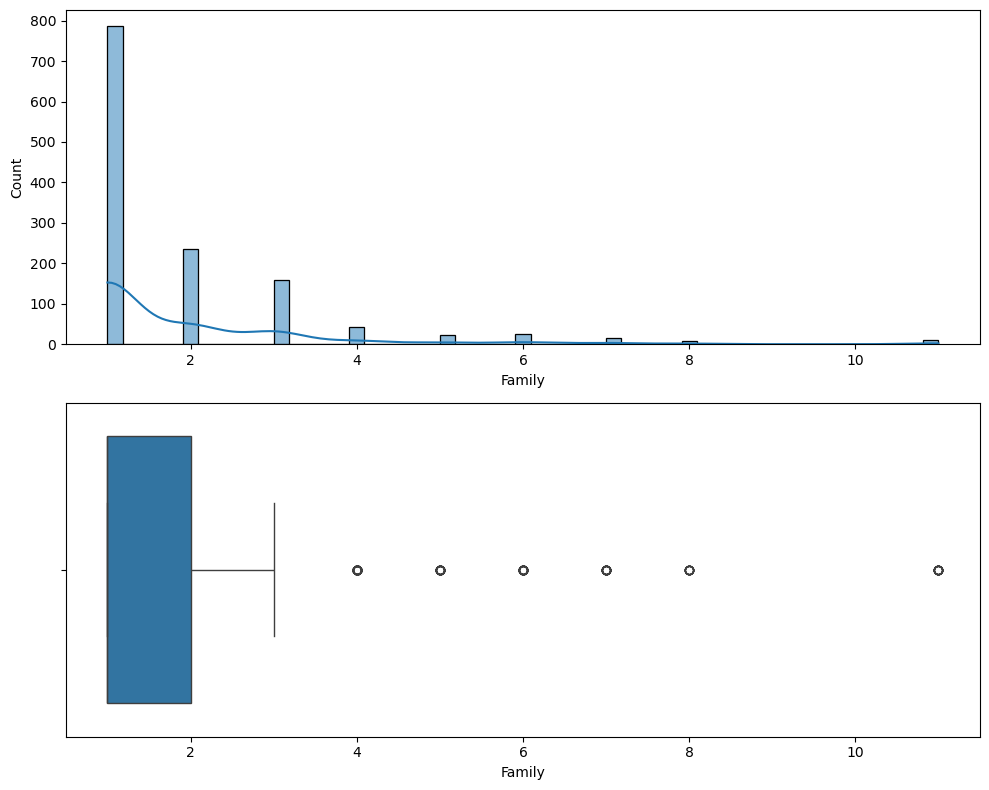

In [23]:
makehisto(df['Family'],df)

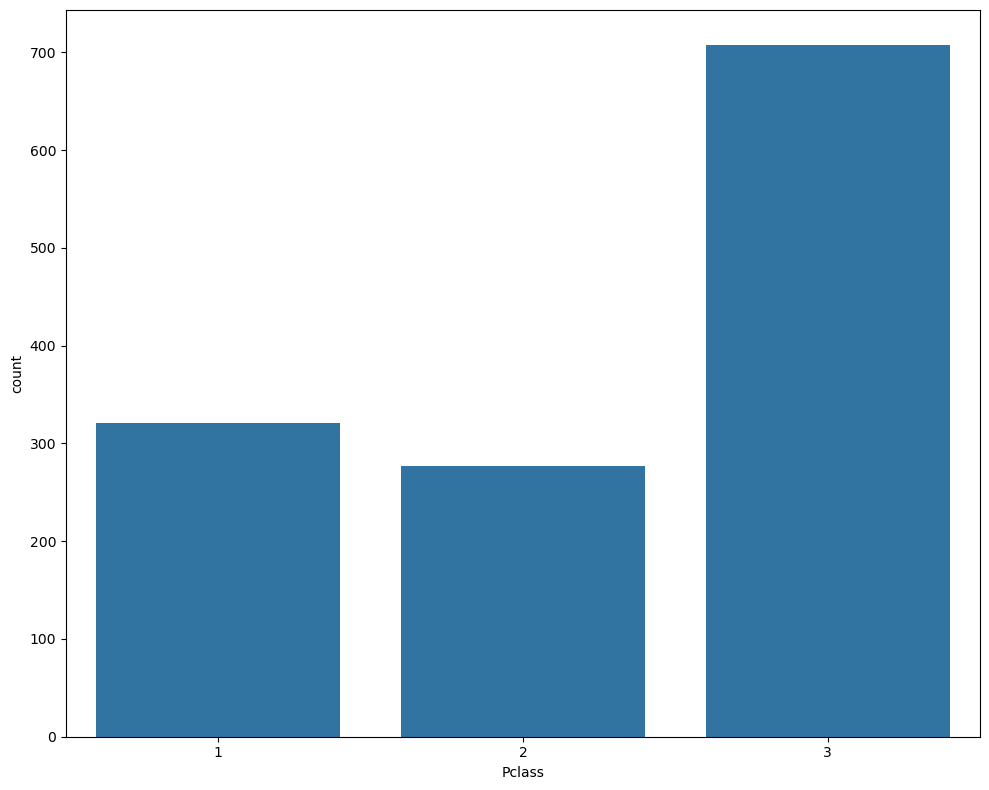

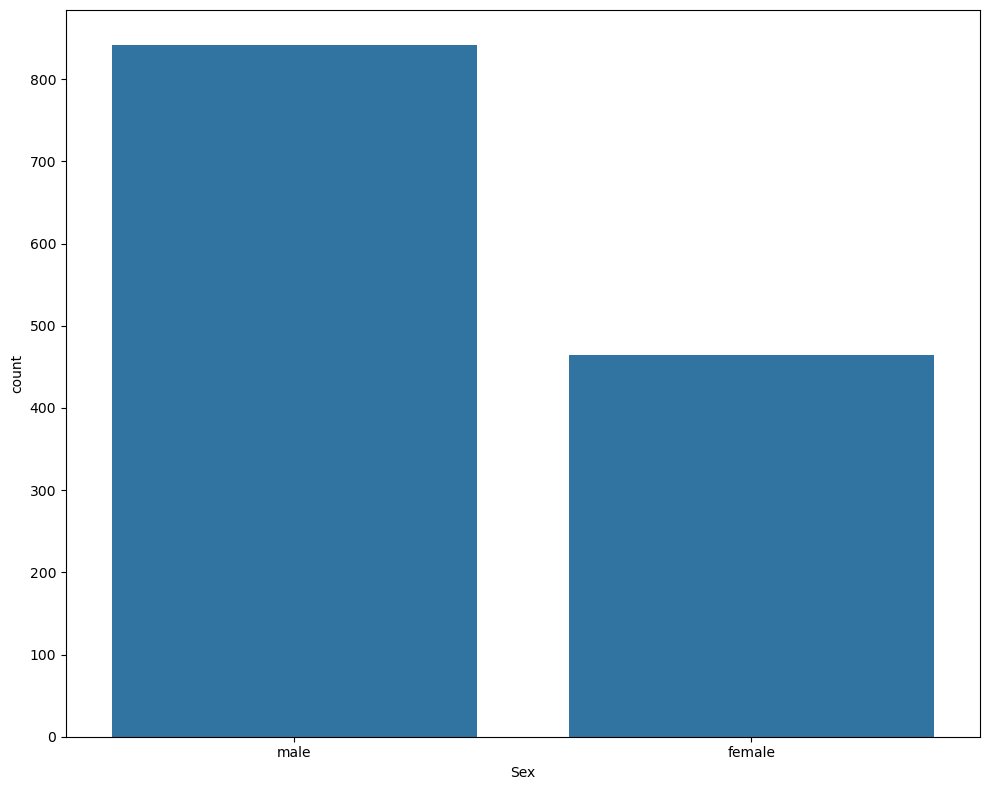

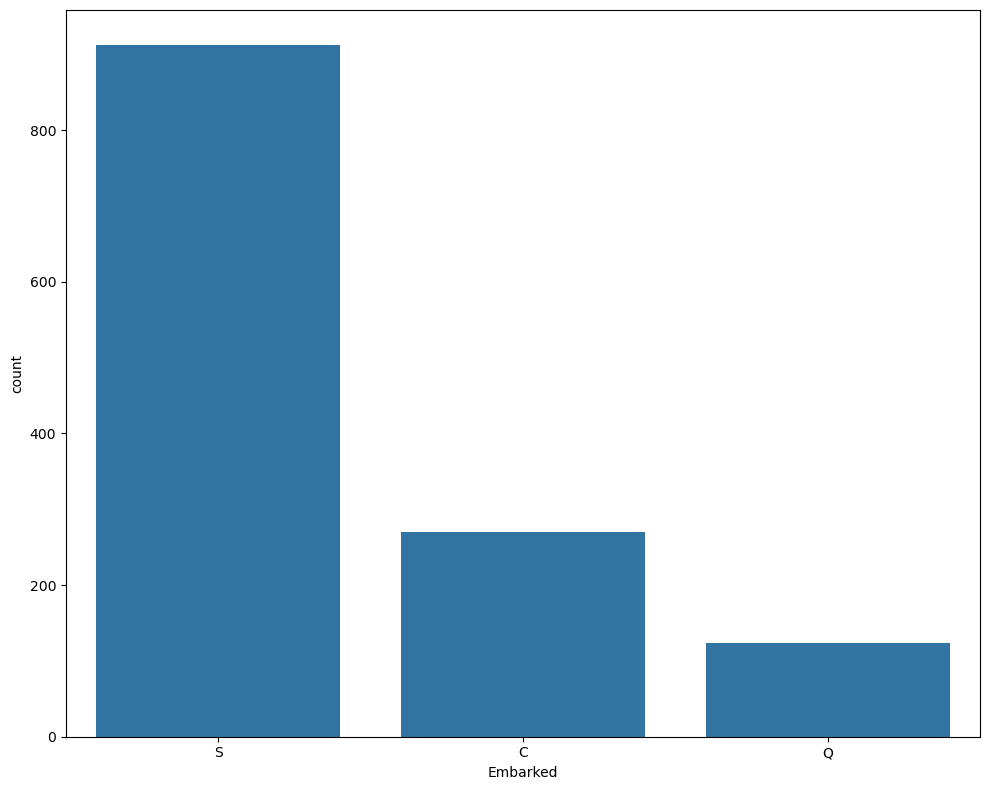

In [24]:
#Analysis for cateogorical data
def barplo(colname,df):
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=colname)
    plt.tight_layout()
    plt.show()
col=['Pclass','Sex','Embarked']
for columns in col:
    barplo(columns,df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   object 
 3   Age       1306 non-null   float64
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1306 non-null   object 
 8   Family    1306 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 102.0+ KB


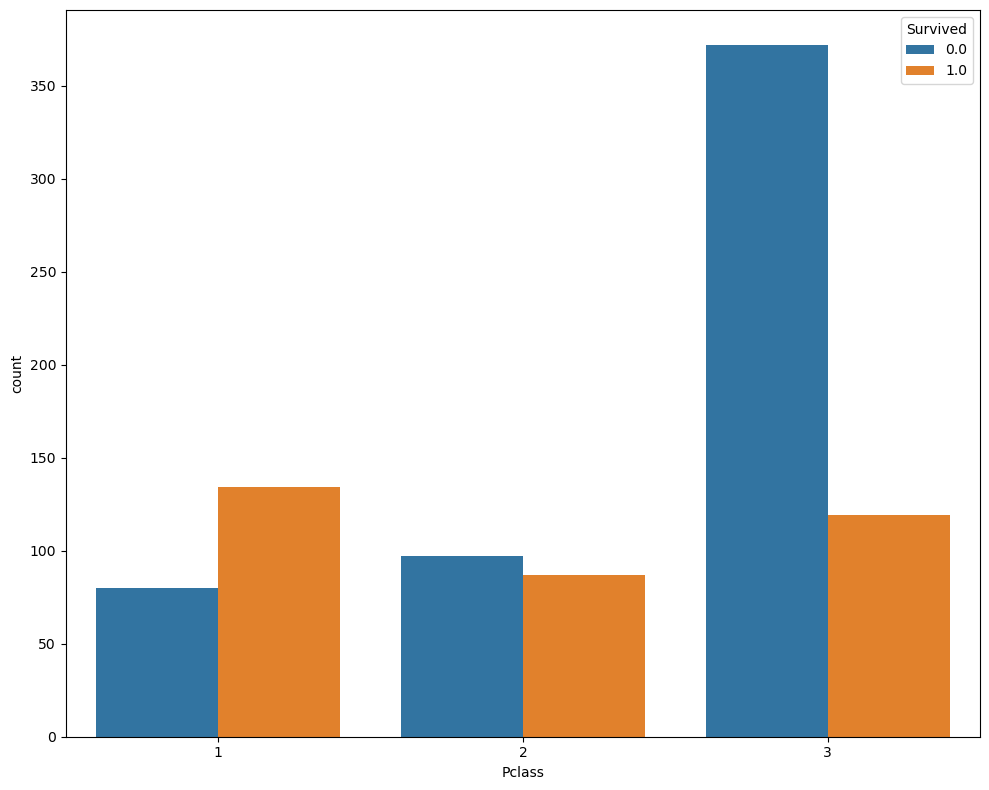

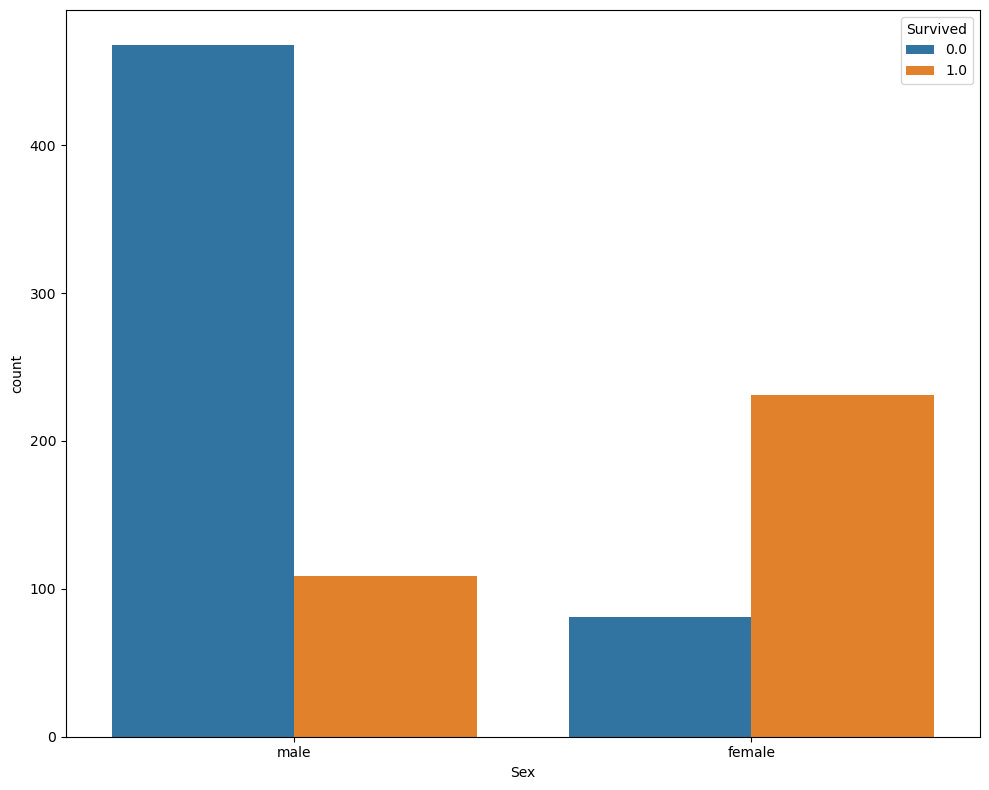

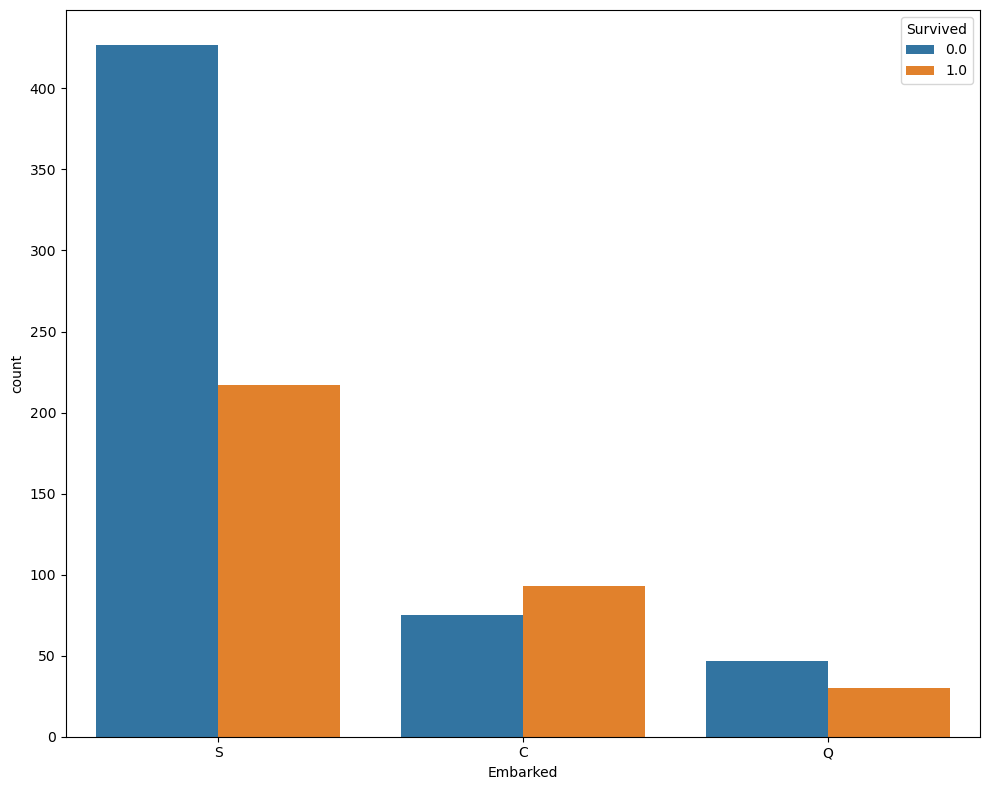

In [26]:
#Performing bivariate analysis on df
def barploti(colname,df,hui):
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=colname,hue=hui)
    plt.tight_layout()
    plt.show()
for columns in col:
    barploti(columns,df,df['Survived'])

<Axes: xlabel='Survived', ylabel='Fare'>

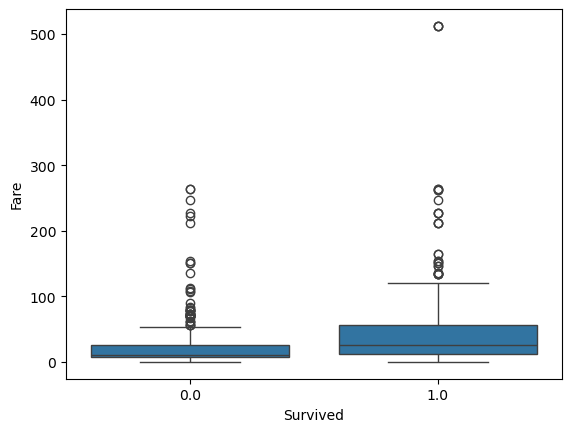

In [27]:
sns.boxplot(data=df,x='Survived',y='Fare')

<Axes: xlabel='Survived', ylabel='Age'>

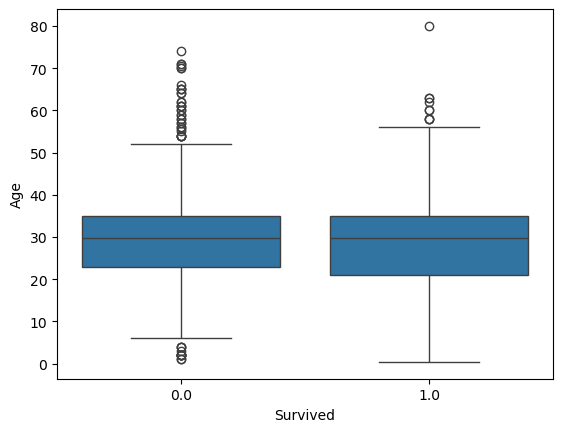

In [28]:
sns.boxplot(data=df,x='Survived',y='Age')

<Axes: xlabel='Age', ylabel='Fare'>

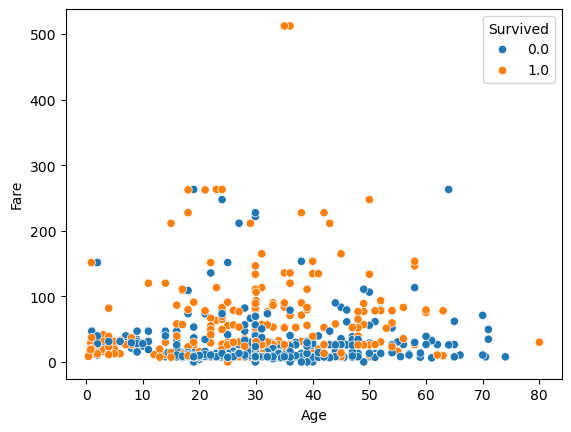

In [29]:
sns.scatterplot(data=df,x='Age',y='Fare',hue='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

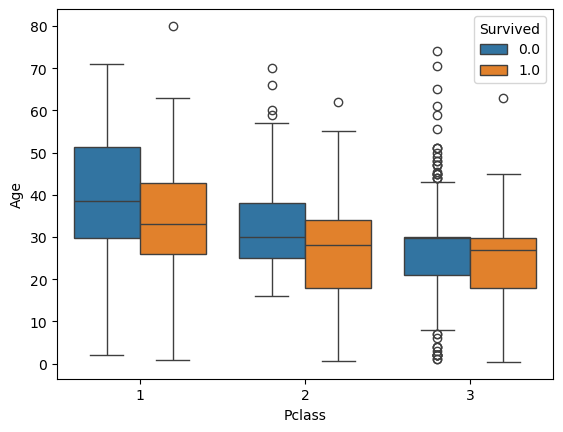

In [30]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Survived')

<Axes: xlabel='Embarked', ylabel='Age'>

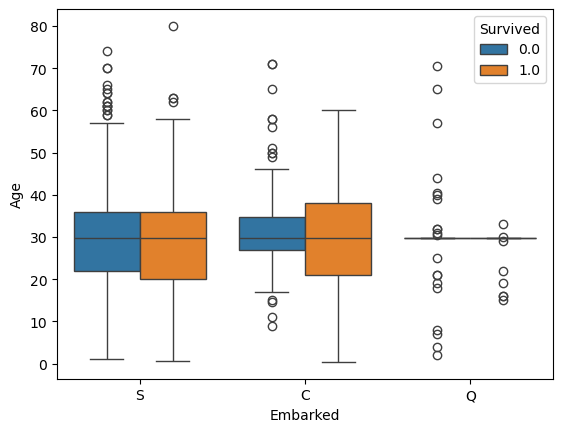

In [31]:
sns.boxplot(data=df,x='Embarked',y='Age',hue='Survived')

In [32]:
from scipy.stats import f_oneway
f, p = f_oneway(df[df['Pclass']==1]['Age'].dropna(),
                df[df['Pclass']==2]['Age'].dropna(),
                df[df['Pclass']==3]['Age'].dropna())
print("p-value:", p)

p-value: 9.93474791918509e-44


Age strongly depends upon Pclass

In [33]:
from scipy.stats import f_oneway
f, p = f_oneway(df[df['Embarked']=='S']['Age'].dropna(),
                df[df['Embarked']=='C']['Age'].dropna(),
                df[df['Embarked']=='Q']['Age'].dropna())
print("p-value:", p)

p-value: 0.017396261789188322


Age depends upon Embarked

In [34]:
num_cols = ['Age', 'Fare', 'SibSp']   
corr_matrix = df[num_cols].corr()
print(corr_matrix)

            Age      Fare     SibSp
Age    1.000000  0.170267 -0.189671
Fare   0.170267  1.000000  0.161030
SibSp -0.189671  0.161030  1.000000


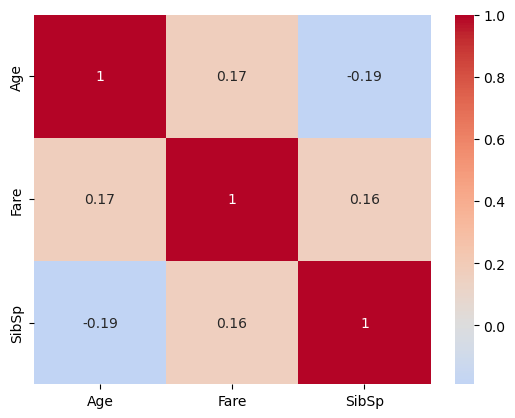

In [35]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

## Insights

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   object 
 3   Age       1306 non-null   float64
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1306 non-null   object 
 8   Family    1306 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 102.0+ KB


In [37]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)


In [38]:
df[['Sex_male','Embarked_Q','Embarked_S']] = df[['Sex_male','Embarked_Q','Embarked_S']].astype(int)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,2,1,0,1
1,1.0,1,38.0,1,0,71.2833,2,0,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,1
3,1.0,1,35.0,1,0,53.1000,2,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1


## Making of Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Features (all rows
train_len=len(df_train)
X = df.drop(['Survived'], axis=1)

# Target (only training part)
y = df['Survived'][:train_len]

# Training features
X_train = X[:train_len]
X_test  = X[train_len:]  # features only, no y for test set


In [42]:
train_len = len(df_train)  # original training set length
y = df['Survived'][:train_len]

y = y.fillna(y.mode()[0])
print("Number of NaNs in y:", y.isnull().sum())

Number of NaNs in y: 0


In [43]:
y.value_counts()

Survived
0.0    551
1.0    340
Name: count, dtype: int64

There is no imbalance in the data

In [44]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y, test_size=0.2, random_state=42
)


In [45]:
model = DecisionTreeClassifier(criterion='gini',max_depth=5)

model.fit(X_tr,y_tr)

DecisionTreeClassifier(max_depth=5)

In [46]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_val)
accuracy_score(y_val,y_pred)

0.7988826815642458

In [47]:
train_acc = model.score(X_tr, y_tr)   # accuracy on training data
val_acc = model.score(X_val, y_val) 
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

Training Accuracy: 0.8567415730337079
Validation Accuracy: 0.7988826815642458


In [48]:
from sklearn.svm import SVC


In [49]:
model2=SVC()
model2.fit(X_tr,y_tr)
y_pred2=model2.predict(X_val)
print(accuracy_score(y_val,y_pred2))

0.6368715083798883


In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model3=GaussianNB()
model3.fit(X_tr,y_tr)
y_pred3=model3.predict(X_val)
print(accuracy_score(y_val,y_pred3))

0.7932960893854749


In [52]:
train_acc2 = model3.score(X_tr, y_tr)   # accuracy on training data
val_acc2 = model3.score(X_val, y_val) 
print("Training Accuracy:", train_acc2)
print("Validation Accuracy:", val_acc2)

Training Accuracy: 0.7879213483146067
Validation Accuracy: 0.7932960893854749


In [53]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(X_tr,y_tr)
y_pred3=model4.predict(X_val)
print(accuracy_score(y_val,y_pred3))

0.776536312849162


In [54]:
train_acc3 = model4.score(X_tr, y_tr)   # accuracy on training data
val_acc3 = model4.score(X_val, y_val) 
print("Training Accuracy:", train_acc3)
print("Validation Accuracy:", val_acc3)

Training Accuracy: 0.9831460674157303
Validation Accuracy: 0.776536312849162


Model1 is suitable for hyper-tuning because it is balanced on both training and testing, whereas model4 is overfitting.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, 5, 7, 9, 12, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.02, 0.05],
}

search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=100, cv=5, scoring='accuracy',
    random_state=42, n_jobs=-1
)
search.fit(X_tr, y_tr)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.005, 0.01,
                                                      0.02, 0.05],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 12, 15, 20,
                                                      None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   random_state=42, scoring='accuracy')

In [56]:
best_tree = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Training accuracy:", best_tree.score(X_tr, y_tr))
print("Validation accuracy:", best_tree.score(X_val, y_val))


Best parameters: {'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Training accuracy: 0.8820224719101124
Validation accuracy: 0.8212290502793296


In [57]:
from xgboost import XGBClassifier

baseline_model = XGBClassifier(
    n_estimators=500,         # start large, will prune via early stopping
    learning_rate=0.05,       # slow, smooth learning
    max_depth=5,              # moderate depth
    subsample=0.8,            # sample 80% of rows per tree
    colsample_bytree=0.8,     # sample 80% of features per tree
    random_state=42
)

baseline_model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='accuracy',
    early_stopping_rounds=20,  # stop if no improvement for 20 rounds
    verbose=True
)

print("Baseline Train Accuracy:", baseline_model.score(X_tr, y_tr))
print("Baseline Validation Accuracy:", baseline_model.score(X_val, y_val))


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'